# Importing Libraries

In [1]:
from fitizens_libraries.load_and_process_training_data import load_training_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.classification import *

# Creating Auxiliary Functions


In [2]:
def create_custom_dataframe(series):
    df =  series[["linAccX", "linAccY", "linAccZ", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ"]]
    return df

In [3]:
def create_training_data_stats(df, target):
    stats_dict = {}
    series = create_custom_dataframe(df)
    
    for column in series.columns:
        mean = series[column].mean()
        std = series[column].std()
        median = series[column].median()
        skewness = series[column].skew()
        kurtosis = series[column].kurtosis()
        variance = series[column].var()  # Calculate variance
        
        # Calculate root mean square (RMS)
        rms = np.sqrt(np.mean(series[column]**2))

        stats_dict[f"{column}_mean"] = mean
        stats_dict[f"{column}_std"] = std
        stats_dict[f"{column}_median"] = median
        stats_dict[f"{column}_skewness"] = skewness
        stats_dict[f"{column}_kurtosis"] = kurtosis
        stats_dict[f"{column}_variance"] = variance  
        stats_dict[f"{column}_rms"] = rms
        
    stats_dict["target"] = target
    return stats_dict


# Loading Data

In [4]:
folder_path = "JACK"
os.makedirs(folder_path, exist_ok=True)
file_names = [f"{folder_path}/{name}" for name in os.listdir(folder_path)]
signals = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX', 'linAccY', 'linAccZ']

data, wk = load_training_data(filelist=file_names,
                         signals= signals,
                          target_exercise="JUMPING_JACK", other_exercises=[])
data[0]

{'series':                          accX_orig  accY_orig  accZ_orig  gyroX_orig  \
 time                                                                   
 1970-01-01 00:00:00.703   2.440766  30.665117   2.661837   -6.160000   
 1970-01-01 00:00:00.712   1.564962  29.667274   6.720209   -7.210000   
 1970-01-01 00:00:00.721   1.567355  29.069048   8.129632   -8.050000   
 1970-01-01 00:00:00.730   1.483603  26.556494   8.153561  -16.450001   
 1970-01-01 00:00:00.739   1.177311  24.493807   7.342365  -23.590000   
 ...                            ...        ...        ...         ...   
 1970-01-01 00:00:01.625   2.455124  13.603683  -0.152223  -89.950005   
 1970-01-01 00:00:01.634   3.137102  19.073870  -4.165130   -3.710000   
 1970-01-01 00:00:01.643   0.868626  18.552216  -5.687020   32.689999   
 1970-01-01 00:00:01.652   1.158168  21.667782   0.209106   70.000000   
 1970-01-01 00:00:01.661   1.663071  22.416763   2.733624   81.899994   
 
                          gyroY_orig  g

# Creating new data

In [5]:
data_info = [create_training_data_stats(info["series"], info["target"]) for info in data]
data_custom = pd.DataFrame(data_info)
data_custom.head()

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_variance,linAccX_rms,linAccY_mean,linAccY_std,linAccY_median,...,magnY_variance,magnY_rms,magnZ_mean,magnZ_std,magnZ_median,magnZ_skewness,magnZ_kurtosis,magnZ_variance,magnZ_rms,target
0,-0.207782,0.438702,-0.190637,0.054221,-1.178878,0.192460,0.483473,0.214137,0.210200,0.270839,...,0.536434,102.034227,166.011219,1.245363,165.550816,0.325827,-1.577472,1.550928,166.015845,JUMPING_JACK
1,-0.282432,0.437837,-0.305206,-0.034319,-1.293961,0.191702,0.519184,0.346227,0.324621,0.305956,...,0.453845,102.052534,166.006566,0.441644,166.200277,-1.001343,0.079392,0.195049,166.007147,JUMPING_JACK
2,-0.201657,0.187199,-0.214946,-0.053486,-1.071594,0.035043,0.274515,0.288308,0.278174,0.376557,...,0.745550,101.571531,164.677143,2.549290,164.763061,-0.114341,-1.284576,6.498881,164.696676,JUMPING_JACK
3,-0.169437,0.382141,-0.232884,0.460978,-0.632914,0.146032,0.416287,0.436779,0.263617,0.408156,...,0.472843,101.008488,161.322156,1.400046,161.541949,-0.207612,-0.968812,1.960128,161.328171,JUMPING_JACK
4,-0.152880,0.450418,-0.277632,0.558749,-1.070005,0.202876,0.473497,0.366785,0.315569,0.264149,...,0.338932,102.026526,163.454130,0.411777,163.460457,-0.055976,-0.556275,0.169560,163.454643,JUMPING_JACK


In [6]:
data_custom.columns

Index(['linAccX_mean', 'linAccX_std', 'linAccX_median', 'linAccX_skewness',
       'linAccX_kurtosis', 'linAccX_variance', 'linAccX_rms', 'linAccY_mean',
       'linAccY_std', 'linAccY_median', 'linAccY_skewness', 'linAccY_kurtosis',
       'linAccY_variance', 'linAccY_rms', 'linAccZ_mean', 'linAccZ_std',
       'linAccZ_median', 'linAccZ_skewness', 'linAccZ_kurtosis',
       'linAccZ_variance', 'linAccZ_rms', 'gyroX_mean', 'gyroX_std',
       'gyroX_median', 'gyroX_skewness', 'gyroX_kurtosis', 'gyroX_variance',
       'gyroX_rms', 'gyroY_mean', 'gyroY_std', 'gyroY_median',
       'gyroY_skewness', 'gyroY_kurtosis', 'gyroY_variance', 'gyroY_rms',
       'gyroZ_mean', 'gyroZ_std', 'gyroZ_median', 'gyroZ_skewness',
       'gyroZ_kurtosis', 'gyroZ_variance', 'gyroZ_rms', 'magnX_mean',
       'magnX_std', 'magnX_median', 'magnX_skewness', 'magnX_kurtosis',
       'magnX_variance', 'magnX_rms', 'magnY_mean', 'magnY_std',
       'magnY_median', 'magnY_skewness', 'magnY_kurtosis', 'magnY_vari

# EDA

In [13]:
data_custom.shape

(1567, 64)

In [14]:
data_custom.isnull().sum()

linAccX_mean        0
linAccX_std         0
linAccX_median      0
linAccX_skewness    0
linAccX_kurtosis    0
                   ..
magnZ_skewness      0
magnZ_kurtosis      0
magnZ_variance      0
magnZ_rms           0
target              0
Length: 64, dtype: int64

In [15]:
data_custom.target.value_counts()

NO_EXERCISE     1201
JUMPING_JACK     366
Name: target, dtype: int64

In [16]:
corr_matrix = data_custom.drop(columns=["target"],axis=1).corr()
corr_matrix

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_variance,linAccX_rms,linAccY_mean,linAccY_std,linAccY_median,...,magnY_kurtosis,magnY_variance,magnY_rms,magnZ_mean,magnZ_std,magnZ_median,magnZ_skewness,magnZ_kurtosis,magnZ_variance,magnZ_rms
linAccX_mean,1.000000,-0.356524,0.965910,0.115884,0.179923,-0.411323,-0.214152,-0.438003,-0.234451,-0.432902,...,-0.016818,0.024324,-0.287555,0.318410,-0.098122,0.318156,0.056496,-0.042916,-0.074243,-0.045186
linAccX_std,-0.356524,1.000000,-0.318731,-0.144203,-0.270354,0.935423,0.886412,0.256839,0.681923,0.187303,...,-0.040033,0.019702,0.107065,-0.116334,0.119591,-0.116118,-0.187708,-0.091169,0.065987,0.025993
linAccX_median,0.965910,-0.318731,1.000000,-0.048288,0.170502,-0.373874,-0.177487,-0.415533,-0.214566,-0.415403,...,-0.025078,0.015619,-0.277838,0.302996,-0.079268,0.302720,0.060503,-0.048829,-0.068868,-0.035125
linAccX_skewness,0.115884,-0.144203,-0.048288,1.000000,0.140315,-0.125562,-0.125006,-0.077491,-0.158600,-0.044035,...,0.086343,-0.027820,-0.021098,0.045076,-0.103178,0.045062,0.081479,0.112984,-0.065001,-0.041809
linAccX_kurtosis,0.179923,-0.270354,0.170502,0.140315,1.000000,-0.265463,-0.247361,-0.089263,-0.248275,-0.082795,...,0.074028,0.054227,-0.109421,0.096397,0.062317,0.096000,0.195315,0.090368,0.036553,-0.116199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magnZ_median,0.318156,-0.116118,0.302720,0.045062,0.096000,-0.076821,-0.080077,0.035814,-0.055618,-0.014796,...,-0.068028,-0.095201,-0.958492,0.999997,-0.040435,1.000000,-0.089891,-0.054061,0.004155,0.287623
magnZ_skewness,0.056496,-0.187708,0.060503,0.081479,0.195315,-0.159460,-0.133900,-0.119446,-0.261694,-0.109331,...,0.090011,0.017044,0.049692,-0.088300,0.030977,-0.089891,1.000000,0.136556,0.002134,-0.003635
magnZ_kurtosis,-0.042916,-0.091169,-0.048829,0.112984,0.090368,-0.049001,-0.063725,-0.021766,-0.119730,0.005779,...,0.262828,-0.127499,0.068203,-0.054111,-0.252149,-0.054061,0.136556,1.000000,-0.159279,0.023404
magnZ_variance,-0.074243,0.065987,-0.068868,-0.065001,0.036553,0.011164,0.042001,-0.129493,0.227911,-0.121165,...,-0.053171,0.490502,-0.033428,0.004254,0.886884,0.004155,0.002134,-0.159279,1.000000,0.191592


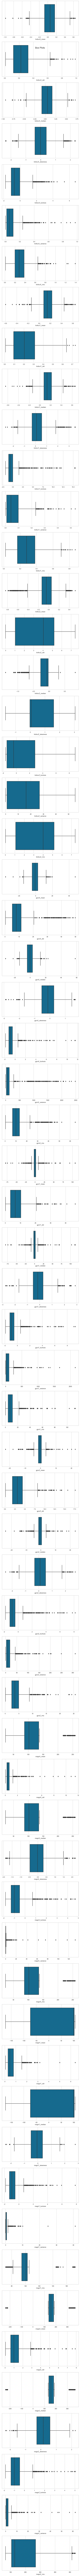

In [17]:
# Create a figure and a set of subplots
df_box = data_custom.drop(columns=["target"],axis=1)
fig, axes = plt.subplots(nrows=len(df_box.columns), ncols=1, figsize=(8, 4 * len(df_box.columns)))

# Create a box plot for each column
for i, col in enumerate(df_box.columns):
    sns.boxplot(x=df_box[col], ax=axes[i])

# Add a title (optional)
fig.suptitle('Box Plots', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# ML with Pycaret

In [6]:
data_dev = data_custom.sample(frac=0.95, random_state=786)
data_prod = data_custom.drop(data_dev.index)

data_dev.reset_index(inplace=True, drop=True)
data_prod.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_dev.shape))
print('Simulated data For Production ' + str(data_prod.shape))

Data for Modeling: (1489, 64)
Simulated data For Production (78, 64)


In [7]:
model = setup(
    # Basic options
    data = data_dev,
    target = "target",
    train_size = 0.7,
    preprocess = True,
    
    # Dealing with multicollinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.9,
        
    # Feature normalization with outliers
    normalize = True,
    normalize_method = 'robust',
        
    # Paralellization options
    n_jobs = - 1,
    use_gpu = False,
    
    # Imbalance Dataset
    fix_imbalance=True,
    
    # Feature Importance
    feature_selection = True,
    n_features_to_select= 10
)

[LightGBM] [Info] Number of positive: 800, number of negative: 800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,2292
1,Target,target
2,Target type,Binary
3,Target mapping,"JUMPING_JACK: 0, NO_EXERCISE: 1"
4,Original data shape,"(1489, 64)"
5,Transformed data shape,"(2047, 11)"
6,Transformed train set shape,"(1600, 11)"
7,Transformed test set shape,"(447, 11)"
8,Numeric features,63
9,Preprocess,True


In [8]:
models = compare_models(sort="F1", fold=5)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8906,0.9598,0.8906,0.9009,0.8930,0.7087,0.7153,1.6360
et,Extra Trees Classifier,0.8800,0.9562,0.8800,0.9005,0.8848,0.6948,0.7077,0.3160
lightgbm,Light Gradient Boosting Machine,0.8819,0.9503,0.8819,0.8905,0.8840,0.6819,0.6872,0.3200
gbc,Gradient Boosting Classifier,0.8772,0.9483,0.8772,0.8936,0.8813,0.6823,0.6919,0.3220
lr,Logistic Regression,0.8733,0.9579,0.8733,0.9047,0.8800,0.6898,0.7109,1.5580
xgboost,Extreme Gradient Boosting,0.8772,0.9513,0.8772,0.8881,0.8799,0.6733,0.6797,0.2780
rf,Random Forest Classifier,0.8714,0.9478,0.8714,0.8893,0.8759,0.6686,0.6790,0.2840
svm,SVM - Linear Kernel,0.8647,0.0000,0.8647,0.8993,0.8720,0.6712,0.6939,0.1820
qda,Quadratic Discriminant Analysis,0.8628,0.9398,0.8628,0.9053,0.8710,0.6739,0.7034,0.1900
dt,Decision Tree Classifier,0.8704,0.8230,0.8704,0.8724,0.8705,0.6377,0.6398,1.1280


In [9]:
cnt_models_df = pull()
cnt_models_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8906,0.9598,0.8906,0.9009,0.8930,0.7087,0.7153,1.636
et,Extra Trees Classifier,0.8800,0.9562,0.8800,0.9005,0.8848,0.6948,0.7077,0.316
lightgbm,Light Gradient Boosting Machine,0.8819,0.9503,0.8819,0.8905,0.8840,0.6819,0.6872,0.320
gbc,Gradient Boosting Classifier,0.8772,0.9483,0.8772,0.8936,0.8813,0.6823,0.6919,0.322
lr,Logistic Regression,0.8733,0.9579,0.8733,0.9047,0.8800,0.6898,0.7109,1.558
xgboost,Extreme Gradient Boosting,0.8772,0.9513,0.8772,0.8881,0.8799,0.6733,0.6797,0.278
rf,Random Forest Classifier,0.8714,0.9478,0.8714,0.8893,0.8759,0.6686,0.6790,0.284
svm,SVM - Linear Kernel,0.8647,0.0000,0.8647,0.8993,0.8720,0.6712,0.6939,0.182
qda,Quadratic Discriminant Analysis,0.8628,0.9398,0.8628,0.9053,0.8710,0.6739,0.7034,0.190
dt,Decision Tree Classifier,0.8704,0.8230,0.8704,0.8724,0.8705,0.6377,0.6398,1.128


In [10]:
clf = create_model('et', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8804,0.9629,0.8804,0.9079,0.8863,0.7063,0.7246
1,0.8947,0.9649,0.8947,0.9088,0.8984,0.7297,0.7378
2,0.8606,0.9390,0.8606,0.8692,0.8638,0.6264,0.6289
3,0.8942,0.9686,0.8942,0.9056,0.8975,0.7223,0.7282
4,0.8702,0.9550,0.8702,0.9031,0.8773,0.6829,0.7047
Mean,0.8800,0.9581,0.8800,0.8989,0.8847,0.6935,0.7048
Std,0.0134,0.0105,0.0134,0.0150,0.0130,0.0372,0.0394


In [11]:
tuned_clf = tune_model(clf, optimize = 'F1', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8565,0.9584,0.8565,0.9059,0.8655,0.6663,0.7012
1,0.8612,0.9486,0.8612,0.8862,0.8676,0.6550,0.6688
2,0.8558,0.9243,0.8558,0.8725,0.8610,0.6264,0.6335
3,0.8654,0.9589,0.8654,0.9150,0.8741,0.6851,0.7218
4,0.8413,0.9616,0.8413,0.9060,0.8525,0.6398,0.6858
Mean,0.8560,0.9504,0.8560,0.8971,0.8642,0.6545,0.6822
Std,0.0081,0.0137,0.0081,0.0155,0.0072,0.0204,0.0300


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


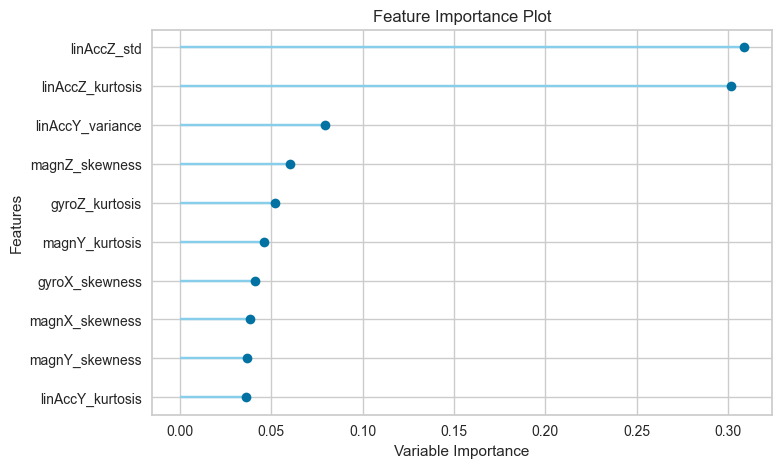

In [12]:
# Get feature importance
plot_model(tuned_clf, plot='feature')

In [13]:
# Create an ensemble of models
ensembled_clf = ensemble_model(tuned_clf, method='Boosting', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8756,0.9645,0.8756,0.9054,0.8820,0.6964,0.7162
1,0.8804,0.9550,0.8804,0.8880,0.8830,0.6825,0.6852
2,0.8510,0.9327,0.8510,0.8571,0.8535,0.5950,0.5962
3,0.8942,0.9663,0.8942,0.9086,0.8980,0.7261,0.7343
4,0.8894,0.9563,0.8894,0.9209,0.8955,0.7299,0.7532
Mean,0.8781,0.9550,0.8781,0.8960,0.8824,0.6860,0.6970
Std,0.0151,0.0120,0.0151,0.0221,0.0158,0.0489,0.0551


In [14]:
bagged_clf = ensemble_model(tuned_clf, method='Bagging', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8612,0.9633,0.8612,0.9031,0.8695,0.6716,0.7002
1,0.8947,0.9590,0.8947,0.9120,0.8989,0.7332,0.7440
2,0.8798,0.9411,0.8798,0.8876,0.8825,0.6779,0.6807
3,0.8750,0.9588,0.8750,0.9014,0.8811,0.6888,0.7053
4,0.8798,0.9682,0.8798,0.9164,0.8868,0.7101,0.7368
Mean,0.8781,0.9581,0.8781,0.9041,0.8838,0.6963,0.7134
Std,0.0107,0.0092,0.0107,0.0099,0.0095,0.0226,0.0236


In [15]:
tuned_ensemble_models = [ensembled_clf, bagged_clf]

In [16]:
from pycaret.classification import blend_models

# Blend multiple ensembled models
blended_ensemble = blend_models(tuned_ensemble_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.9430,0.8286,0.8894,0.8398,0.6127,0.6526
1,0.9143,0.9745,0.9143,0.9193,0.9159,0.7731,0.7753
2,0.8846,0.9536,0.8846,0.8886,0.8862,0.6842,0.6852
3,0.8750,0.9630,0.8750,0.9014,0.8811,0.6888,0.7053
4,0.8750,0.9641,0.8750,0.8700,0.8696,0.6202,0.6269
5,0.8365,0.9099,0.8365,0.8509,0.8416,0.5709,0.5755
6,0.8942,0.9734,0.8942,0.9192,0.8994,0.7366,0.7544
7,0.8558,0.9646,0.8558,0.8631,0.8586,0.6108,0.6126
8,0.8750,0.9568,0.8750,0.9097,0.8820,0.6966,0.7207


In [17]:
print("Total of features: ", len(ensembled_clf.feature_importances_))

Total of features:  10


In [18]:
evaluate_model(ensembled_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Save Model

In [19]:
# We finalize model (we train on the whole set)
model_final = finalize_model(tuned_clf)

In [20]:
# Export the PyCaret model
save_model(model_final, 'jack_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['linAccX_mean', 'linAccX_std',
                                              'linAccX_median',
                                              'linAccX_skewness',
                                              'linAccX_kurtosis',
                                              'linAccX_variance', 'linAccX_rms',
                                              'linAccY_mean', 'linAccY...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                             

# Use in Production

In [21]:
# Load the model
pipeline = load_model(model_name="jack_model")

Transformation Pipeline and Model Successfully Loaded


In [22]:
# Utilizar modelo
prediction = predict_model(pipeline, data_prod, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9359,0.9750,0.9359,0.9419,0.9373,0.8398,0.8437


In [25]:
prediction

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccX_variance,linAccX_rms,linAccY_mean,linAccY_std,linAccY_median,...,magnZ_std,magnZ_median,magnZ_skewness,magnZ_kurtosis,magnZ_variance,magnZ_rms,target,prediction_label,prediction_score_JUMPING_JACK,prediction_score_NO_EXERCISE
0,-0.115309,0.316093,-0.157436,0.085769,-1.396778,0.099915,0.334965,0.212445,0.408224,0.259808,...,1.013172,164.326340,0.646009,-0.738722,1.026518,164.630798,JUMPING_JACK,JUMPING_JACK,0.75,0.25
1,-0.105367,0.276521,-0.137368,0.325079,-0.977811,0.076464,0.294647,0.294843,0.413519,0.357392,...,1.370079,166.026062,-0.131401,-1.613744,1.877117,165.883270,JUMPING_JACK,JUMPING_JACK,0.84,0.16
2,-0.008745,0.330332,-0.016726,0.040749,-0.371237,0.109119,0.328588,0.272752,0.325989,0.252511,...,0.647068,138.593704,-1.169064,0.614314,0.418697,138.424408,JUMPING_JACK,JUMPING_JACK,1.00,0.00
3,0.013346,0.294500,-0.039086,0.205028,-1.193467,0.086730,0.293199,0.272772,0.381170,0.244334,...,1.538229,137.709976,-0.757740,-0.895424,2.366147,136.851227,JUMPING_JACK,JUMPING_JACK,0.97,0.03
4,0.035834,0.212017,0.014772,0.059783,-0.141787,0.044951,0.213872,0.258751,0.259393,0.248309,...,1.132872,138.691849,-0.371042,-1.284252,1.283400,138.394547,JUMPING_JACK,JUMPING_JACK,0.86,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.113230,0.105027,-0.111648,-0.163391,-0.995156,0.011031,0.154043,0.183847,0.121221,0.199621,...,0.352110,313.624847,-0.098195,-1.783738,0.123982,313.557922,NO_EXERCISE,NO_EXERCISE,0.01,0.99
74,-0.190400,0.340970,-0.093389,-0.276671,-1.380324,0.116260,0.389081,-0.036286,0.244722,-0.042621,...,1.637743,-236.380020,-0.011012,-0.768858,2.682201,236.290558,NO_EXERCISE,NO_EXERCISE,0.49,0.51
75,-0.215191,0.270798,-0.168887,-0.055303,-1.040475,0.073332,0.344816,0.095091,0.202244,0.088523,...,1.406021,-236.747070,0.087592,-0.763196,1.976896,236.617279,NO_EXERCISE,NO_EXERCISE,0.40,0.60
76,-0.308837,0.275219,-0.303499,-0.379065,-0.566764,0.075746,0.412757,0.004140,0.407822,0.169236,...,1.839015,-234.945908,0.698008,-0.702813,3.381977,234.572662,NO_EXERCISE,JUMPING_JACK,0.71,0.29


# Scores

In [ ]:
true_labels = prediction["target"]
predictions = prediction["prediction_label"]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predictions)
positive_class_label = "BURPEE"
precision = precision_score(true_labels, predictions, pos_label=positive_class_label)
recall = recall_score(true_labels, predictions, pos_label=positive_class_label)
f1 = f1_score(true_labels, predictions, pos_label=positive_class_label)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_prob = prediction["prediction_score_SQUAT"]
binary_true_labels = true_labels.map({"BRUPEE": 1, "NO_EXERCISE": 0})
auc_score = roc_auc_score(binary_true_labels, predictions_prob)

print(f"AUC: {auc_score}")